In [1]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from datetime import datetime
import numpy as np
import os
rcParams['font.family'] = 'Times New Roman'
# rcParams['font.size'] = 8
# rcParams['axes.titlesize'] = 8
# rcParams['axes.labelsize'] = 8
# rcParams['legend.fontsize'] = 8
# rcParams['xtick.labelsize'] = 8
# rcParams['ytick.labelsize'] = 8

In [2]:
#Use case 
def mem_calc(na,nb,nc,int,frac):
    n_max = max(na,nb,nc)

    norm = 7 * na * (int + frac)    
    w_sum_b = 3 * nb * (int + frac) + 2 * na * nb * (int + frac) #
    w_sum_c = 3 * nc * (int + frac) + 2 * nb * nc * (int + frac) #  
    relu = 1 * nb * (int + frac)
    decode = 5 * 4 * nc * (int + frac)  #
    header = 32 + n_max * (int + frac)
    #iden = 0

    sa_mem = norm # + iden
    sb_mem = w_sum_b + relu 
    sc_mem = w_sum_c # + iden
    sd_mem = decode # + iden
    total = norm + w_sum_b + w_sum_c + relu + decode 
    print(f"PER SWITCH MEM sa:{sa_mem}, sb:{sb_mem}, sc:{sc_mem}, sd:{sd_mem}, ")
    print(f"MEMORY: norm:{norm/8}, w_sum_b:{w_sum_b/8}, w_sum_c:{w_sum_c/8}, relu:{relu/8}, decode:{decode/8}, header:{header/8},  total_bytes:{total/8}")

    #return(sa_mem/(8), sb_mem/(8), sc_mem/(8), sd_mem/(8))
    return(sa_mem/(8*1024), sb_mem/(8*1024), sc_mem/(8*1024), sd_mem/(8*1024))
    
    
    



app_iden
PER SWITCH MEM sa:3024, sb:25056, sc:6384, sd:2240, 
MEMORY: norm:378.0, w_sum_b:3078.0, w_sum_c:798.0, relu:54.0, decode:280.0, header:58.0,  total_bytes:4588.0

os_detec
PER SWITCH MEM sa:3584, sb:34816, sc:3216, sd:960, 
MEMORY: norm:448.0, w_sum_b:4288.0, w_sum_c:402.0, relu:64.0, decode:120.0, header:68.0,  total_bytes:5322.0

net_ml_malware
PER SWITCH MEM sa:1792, sb:18432, sc:2144, sd:640, 
MEMORY: norm:224.0, w_sum_b:2240.0, w_sum_c:268.0, relu:64.0, decode:80.0, header:68.0,  total_bytes:2876.0

country
PER SWITCH MEM sa:1792, sb:18432, sc:3216, sd:960, 
MEMORY: norm:224.0, w_sum_b:2240.0, w_sum_c:402.0, relu:64.0, decode:120.0, header:68.0,  total_bytes:3050.0

Video-Stream
PER SWITCH MEM sa:3584, sb:34816, sc:4288, sd:1280, 
MEMORY: norm:448.0, w_sum_b:4288.0, w_sum_c:536.0, relu:64.0, decode:160.0, header:68.0,  total_bytes:5496.0


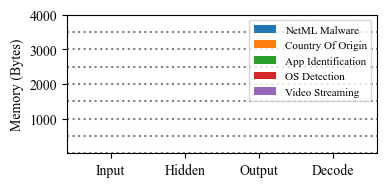

In [3]:
print("app_iden")
sa_mem_1, sb_mem_1, sc_mem_1, sd_mem_1 = mem_calc(27,27,7,8,8)

print("\nos_detec")
sa_mem_2, sb_mem_2, sc_mem_2, sd_mem_2  = mem_calc(32,32,3,8,8)

print("\nnet_ml_malware")
sa_mem_3, sb_mem_3, sc_mem_3, sd_mem_3  = mem_calc(16,32,2,8,8)

print("\ncountry")
sa_mem_4, sb_mem_4, sc_mem_4, sd_mem_4  = mem_calc(16,32,3,8,8)

print("\nVideo-Stream")
sa_mem_5, sb_mem_5, sc_mem_5, sd_mem_5  = mem_calc(32,32,4,8,8)

switches = ("Input", "Hidden", "Output", "Decode")
y_value = { #OPs
    'NetML Malware':       (sa_mem_3, sb_mem_3, sc_mem_3, sd_mem_3),
    'Country Of Origin':   (sa_mem_4, sb_mem_4, sc_mem_4, sd_mem_4),
    'App Identification':  (sa_mem_1, sb_mem_1, sc_mem_1, sd_mem_1),
    'OS Detection':        (sa_mem_2, sb_mem_2, sc_mem_2, sd_mem_2),
    'Video Streaming':     (sa_mem_5, sb_mem_5, sc_mem_5, sd_mem_5)
}

#plt.subplots_adjust(left=0.183, bottom=0.208, right=0.935, top=0.907, wspace=0.2, hspace=0.2)

x = np.arange(len(switches))  # the label locations
width = 0.16  # the width of the bars
multiplier = -1

fig, ax = plt.subplots(figsize=(4, 1.8)) #layout='constrained' #default size = [6.4, 4.8]

for attribute, measurement in y_value.items():
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3, rotation=45)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory (Bytes)')
#ax.set_title('Memory Cost per Layer')
ax.set_xticks(x + width, switches)
ax.legend(loc='upper right', ncols=1, bbox_to_anchor=(1, 1),fontsize=8)
#ax.set_ylim(0, 4.5)

y=np.arange(1000,5000,1000)
ax.set_yticks(y)
y=np.arange(0000,4500,500)
for i in y:
  ax.axhline(i, color="grey", linestyle=":")

now = datetime.now()
dt_string = now.strftime("%d-%m-%Y-%H-%M-%S")
plt.savefig(f"../graphs/mem-costs-{dt_string}.pdf", dpi=300, bbox_inches='tight')
plt.show()



app_iden
PER SWITCH MEM sa:2268, sb:18792, sc:4788, sd:1680, 
MEMORY: norm:283.5, w_sum_b:2308.5, w_sum_c:598.5, relu:40.5, decode:210.0, header:44.5,  total_bytes:3441.0

os_detec
PER SWITCH MEM sa:2688, sb:26112, sc:2412, sd:720, 
MEMORY: norm:336.0, w_sum_b:3216.0, w_sum_c:301.5, relu:48.0, decode:90.0, header:52.0,  total_bytes:3991.5

net_ml_malware
PER SWITCH MEM sa:1344, sb:13824, sc:1608, sd:480, 
MEMORY: norm:168.0, w_sum_b:1680.0, w_sum_c:201.0, relu:48.0, decode:60.0, header:52.0,  total_bytes:2157.0

country
PER SWITCH MEM sa:896, sb:9216, sc:1608, sd:480, 
MEMORY: norm:112.0, w_sum_b:1120.0, w_sum_c:201.0, relu:32.0, decode:60.0, header:36.0,  total_bytes:1525.0

Video-Stream
PER SWITCH MEM sa:3584, sb:34816, sc:4288, sd:1280, 
MEMORY: norm:448.0, w_sum_b:4288.0, w_sum_c:536.0, relu:64.0, decode:160.0, header:68.0,  total_bytes:5496.0


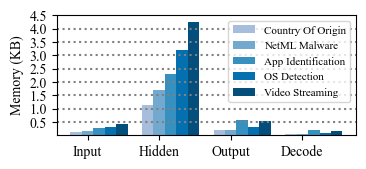

In [4]:
print("app_iden")
sa_mem_1, sb_mem_1, sc_mem_1, sd_mem_1 = mem_calc(27,27,7 ,6,6)

print("\nos_detec")
sa_mem_2, sb_mem_2, sc_mem_2, sd_mem_2  = mem_calc(32,32,3,6,6)

print("\nnet_ml_malware")
sa_mem_3, sb_mem_3, sc_mem_3, sd_mem_3  = mem_calc(16,32,2,6,6)

print("\ncountry")
sa_mem_4, sb_mem_4, sc_mem_4, sd_mem_4  = mem_calc(16,32,3,4,4)

print("\nVideo-Stream")
sa_mem_5, sb_mem_5, sc_mem_5, sd_mem_5  = mem_calc(32,32,4,8,8)

switches = ("Input", "Hidden", "Output", "Decode")
y_value = { #OPs
    'Country Of Origin':   (sa_mem_4, sb_mem_4, sc_mem_4, sd_mem_4),
    'NetML Malware':       (sa_mem_3, sb_mem_3, sc_mem_3, sd_mem_3),
    'App Identification':  (sa_mem_1, sb_mem_1, sc_mem_1, sd_mem_1),
    'OS Detection':        (sa_mem_2, sb_mem_2, sc_mem_2, sd_mem_2),
    'Video Streaming':     (sa_mem_5, sb_mem_5, sc_mem_5, sd_mem_5)
}

#plt.subplots_adjust(left=0.183, bottom=0.208, right=0.935, top=0.907, wspace=0.2, hspace=0.2)

x = np.arange(len(switches))  # the label locations
width = 0.16  # the width of the bars
multiplier = -1

fig, ax = plt.subplots(figsize=(3.5, 1.5), ) #layout='constrained' #default size = [6.4, 4.8]


# for attribute, measurement in y_value.items():
#     offset = width * multiplier 
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     # ax.bar_label(rects, padding=3, rotation=45)
#     multiplier += 1

colors = [
          '#a6bddb',
          '#74a9cf',
          '#3690c0',
          '#0570b0',
          '#034e7b']

for multiplier, (attribute, measurement) in enumerate(y_value.items()):
    offset = width * multiplier 
    # Use a specific color for each attribute
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier])
    # ax.bar_label(rects, padding=3, rotation=45)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory (KB)')
#ax.set_title('Memory Cost per Layer')
ax.set_xticks(x + width, switches)
ax.legend(loc='upper right', ncols=1, bbox_to_anchor=(1, 1),fontsize=8)
ax.set_ylim(0, 4.5)

y=np.arange(0.5,5,0.5)
ax.set_yticks(y)
y=np.arange(0.5,4.5,0.5)
for i in y:
  ax.axhline(i, color="grey", linestyle=":")

plt.subplots_adjust(bottom=0.15, top=0.95, right = 0.98)

now = datetime.now()
dt_string = now.strftime("%d-%m-%Y-%H-%M-%S")
plt.savefig(f"../graphs/mem-costs-{dt_string}.pdf", dpi=300, bbox_inches='tight')
plt.show()



In [5]:
def op_calc(na,nb,nc):
    n_max = max(na,nb,nc)
    int = 8
    frac = 8
    
    n_pipes = 2 #ingress and egress
    op_per_stage = 1
    n_stages = 12 
    n_mcasts = 1

    #Constants obtained by summing the operations on the code
    norm = 10 * na     
    w_sum_b = 2 * nb  + 2 * na * nb    
    w_sum_c = 2 * nc  + 2 * nb * nc    
    relu = 2 * nb 
    decode = 25 * nc 

    sa_op = norm # + iden
    sb_op = w_sum_b + relu
    sc_op = w_sum_c # + iden
    sd_op = decode # + iden
    print(f"PER SWITCH OPs sa:{sa_op}, sb:{sb_op}, sc:{sc_op}, sd:{sd_op}, ")

    sa_recirculations = norm                  /n_pipes /(op_per_stage * n_stages )/n_mcasts
    sb_recirculations = (w_sum_b + relu)      /n_pipes /(op_per_stage * n_stages) /n_mcasts
    sc_recirculations = w_sum_c               /n_pipes /(op_per_stage * n_stages) /n_mcasts
    sd_recirculations = decode                /n_pipes /(op_per_stage * n_stages) /n_mcasts

    print(f"PER SWITCH RECIRCULATIONs sa:{sa_recirculations}, sb:{sb_recirculations}, sc:{sc_recirculations}, sd:{sd_recirculations}, ")
    total = norm + w_sum_b + w_sum_c + relu + decode 
    print(f"TOTAL OPs: norm:{norm}, w_sum_b:{w_sum_b}, w_sum_c:{w_sum_c}, relu:{relu}, decode:{decode},  total_ops:{total}")

    return(sa_op, sb_op, sc_op, sd_op, sa_recirculations, sb_recirculations, sc_recirculations, sd_recirculations)

In [6]:
print("app_iden")
sa_op_1, sb_op_1, sc_op_1, sd_op_1 ,sa_recirculations_1 ,sb_recirculations_1 ,sc_recirculations_1 ,sd_recirculations_1 = op_calc(27,27,7)
print("\nos_detec")
sa_op_2, sb_op_2, sc_op_2, sd_op_2 ,sa_recirculations_2 ,sb_recirculations_2 ,sc_recirculations_2 ,sd_recirculations_2 = op_calc(32,32,3)
print("\nnet_ml_malware")
sa_op_3, sb_op_3, sc_op_3, sd_op_3 ,sa_recirculations_3 ,sb_recirculations_3 ,sc_recirculations_3 ,sd_recirculations_3  = op_calc(16,32,2)
print("\ncountry")
sa_op_4, sb_op_4, sc_op_4, sd_op_4 ,sa_recirculations_4 ,sb_recirculations_4 ,sc_recirculations_4 ,sd_recirculations_4  = op_calc(16,32,3)
print("\nvideo-stream")
sa_op_5, sb_op_5, sc_op_5, sd_op_5 ,sa_recirculations_5 ,sb_recirculations_5 ,sc_recirculations_5 ,sd_recirculations_5  = op_calc(32,32,4)

app_iden
PER SWITCH OPs sa:270, sb:1566, sc:392, sd:175, 
PER SWITCH RECIRCULATIONs sa:11.25, sb:65.25, sc:16.333333333333332, sd:7.291666666666667, 
TOTAL OPs: norm:270, w_sum_b:1512, w_sum_c:392, relu:54, decode:175,  total_ops:2403

os_detec
PER SWITCH OPs sa:320, sb:2176, sc:198, sd:75, 
PER SWITCH RECIRCULATIONs sa:13.333333333333334, sb:90.66666666666667, sc:8.25, sd:3.125, 
TOTAL OPs: norm:320, w_sum_b:2112, w_sum_c:198, relu:64, decode:75,  total_ops:2769

net_ml_malware
PER SWITCH OPs sa:160, sb:1152, sc:132, sd:50, 
PER SWITCH RECIRCULATIONs sa:6.666666666666667, sb:48.0, sc:5.5, sd:2.0833333333333335, 
TOTAL OPs: norm:160, w_sum_b:1088, w_sum_c:132, relu:64, decode:50,  total_ops:1494

country
PER SWITCH OPs sa:160, sb:1152, sc:198, sd:75, 
PER SWITCH RECIRCULATIONs sa:6.666666666666667, sb:48.0, sc:8.25, sd:3.125, 
TOTAL OPs: norm:160, w_sum_b:1088, w_sum_c:198, relu:64, decode:75,  total_ops:1585

video-stream
PER SWITCH OPs sa:320, sb:2176, sc:264, sd:100, 
PER SWITCH REC

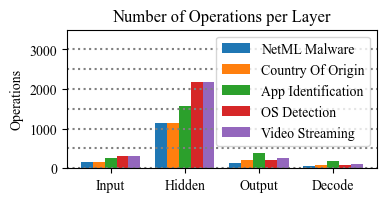

In [7]:
switches = ("Input", "Hidden", "Output", "Decode")
y_value = { #OPs
    'NetML Malware':      (sa_op_3, sb_op_3, sc_op_3, sd_op_3),
    'Country Of Origin':  (sa_op_4, sb_op_4, sc_op_4, sd_op_4),
    'App Identification': (sa_op_1, sb_op_1, sc_op_1, sd_op_1),
    'OS Detection':       (sa_op_2, sb_op_2, sc_op_2, sd_op_2),
    'Video Streaming':    (sa_op_5, sb_op_5, sc_op_5, sd_op_5)
}

#plt.subplots_adjust(left=0.183, bottom=0.208, right=0.935, top=0.907, wspace=0.2, hspace=0.2)

x = np.arange(len(switches))  # the label locations
width = 0.16  # the width of the bars
multiplier = -1

fig, ax = plt.subplots(figsize=(4, 1.8)) #layout='constrained' #default size = [6.4, 4.8]) #layout='constrained'

for attribute, measurement in y_value.items():
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3, rotation=45)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Operations')
ax.set_title('Number of Operations per Layer')
ax.set_xticks(x + width, switches)
ax.legend(loc='upper right', ncols=1, bbox_to_anchor=(1, 1))
ax.set_ylim(0, 3500)

y=np.arange(0,3500,500)
for i in y:
  ax.axhline(i, color="grey", linestyle=":")


now = datetime.now()
dt_string = now.strftime("%d-%m-%Y-%H-%M-%S")
plt.savefig(f"../graphs/op-costs-{dt_string}.pdf", dpi=300, bbox_inches='tight')
plt.show()

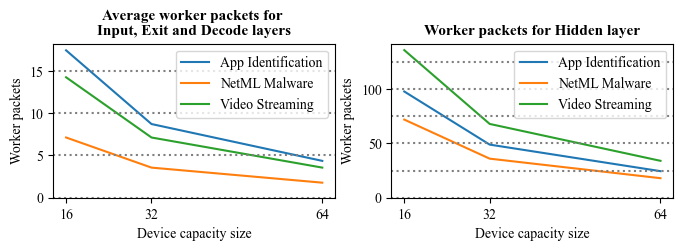

In [8]:
x = capacity_size = [16,32,64] #total operations per ALU
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 2)) #layout='constrained' #default size = [6.4, 4.8]) #layout='constrained'

ax0.set_ylabel('Worker packets')
ax0.set_title('Average worker packets for \nInput, Exit and Decode layers', weight='bold',fontsize=11)

sm_op_1 = (sa_op_1 + sc_op_1 + sd_op_1) /3
sm_op_2 = (sa_op_2 + sc_op_2 + sd_op_2) /3
sm_op_3 = (sa_op_3 + sc_op_3 + sd_op_3) /3
sm_op_4 = (sa_op_4 + sc_op_4 + sd_op_4) /3
sm_op_5 = (sa_op_5 + sc_op_5 + sd_op_5) /3

y1= [sm_op_1/capacity_size[0], sm_op_1/capacity_size[1], sm_op_1/capacity_size[2]] #percentage of packets that are worker packets
y2= [sm_op_2/capacity_size[0], sm_op_2/capacity_size[1], sm_op_2/capacity_size[2]] #percentage of packets that are worker packets
y3= [sm_op_3/capacity_size[0], sm_op_3/capacity_size[1], sm_op_3/capacity_size[2]] 
y4= [sm_op_4/capacity_size[0], sm_op_4/capacity_size[1], sm_op_4/capacity_size[2]] 
y5= [sm_op_5/capacity_size[0], sm_op_5/capacity_size[1], sm_op_5/capacity_size[2]] #percentage of packets that are worker packet
ax0.plot(x, y1, label='App Identification')
#ax0.plot(x, y2, label='OS Detection'      )
ax0.plot(x, y3, label='NetML Malware'     )
#ax0.plot(x, y4, label='Country Of Origin' )
ax0.plot(x, y5, label='Video Streaming'   )
#fig.suptitle('This is a somewhat long figure title', fontsize=16)



#######################################
ax1.set_title('Worker packets for Hidden layer', weight='bold',fontsize=11)
ax1.set_ylabel('Worker packets')

wp1 = [sb_op_1/capacity_size[0],sb_op_1/capacity_size[1],sb_op_1/capacity_size[2]]
wp2 = [sb_op_2/capacity_size[0],sb_op_2/capacity_size[1],sb_op_2/capacity_size[2]]
wp3 = [sb_op_3/capacity_size[0],sb_op_3/capacity_size[1],sb_op_3/capacity_size[2]]
wp4 = [sb_op_4/capacity_size[0],sb_op_4/capacity_size[1],sb_op_4/capacity_size[2]]
wp5 = [sb_op_5/capacity_size[0],sb_op_5/capacity_size[1],sb_op_5/capacity_size[2]]
y1= [wp1[0], wp1[1], wp1[2]] #percentage of packets that are worker packets
y2= [wp2[0], wp2[1], wp2[2]] #percentage of packets that are worker packets
y3= [wp3[0], wp3[1], wp3[2]] 
y4= [wp4[0], wp4[1], wp4[2]] 
y5= [wp5[0], wp5[1], wp5[2]] #percentage of packets that are worker packet
ax1.plot(x, y1, label='App Identification',)
#ax1.plot(x, y2, label='OS Detection'      )
ax1.plot(x, y3, label='NetML Malware'     ,)
#ax1.plot(x, y4, label='Country Of Origin' )
ax1.plot(x, y5, label='Video Streaming'   ,)

#######################################
# ax2.set_title('Video Streaming', weight='bold')
# #ax2.set_ylabel('Percentage of worker packets')
# y1= [sb_op_5/capacity_size[0]/x[0], sb_op_5/capacity_size[0]/x[1], sb_op_5/capacity_size[0]/x[2], sb_op_5/capacity_size[0]/x[3]] #percentage of packets that are worker packets
# ax2.plot(x,y1, label='8')
# y2= [sb_op_5/capacity_size[1]/x[0], sb_op_5/capacity_size[1]/x[1], sb_op_5/capacity_size[1]/x[2], sb_op_5/capacity_size[1]/x[3]] #percentage of packets that are worker packets
# ax2.plot(x,y2, label='16')
# y3= [sb_op_1/capacity_size[2]/x[0], sb_op_5/capacity_size[2]/x[1], sb_op_5/capacity_size[2]/x[2], sb_op_5/capacity_size[2]/x[3]] #percentage of packets that are worker packets
# ax2.plot(x, y3, label='32')
# ax2.set_ylim(0-1,max(y1)+1)

#########################################
ax0.set_ylim(0)
ax1.set_ylim(0)
# ax1.set_ylim(0-0.2,max(y1)+0.5)
# ax2.set_ylim(0-0.2,max(y1)+0.5)


# ax1.set_xlim(100,100000+10)
# ax2.set_xlim(100,100000+10)

ax0.set_xlabel('Device capacity size')
ax1.set_xlabel('Device capacity size')
# ax2.set_xlabel('# of pkts in the flow')

ax0.set_xticks(x)
ax1.set_xticks(x)
# ax2.set_xscale('log')

ax0.legend(loc='upper right', ncols=1, bbox_to_anchor=(1, 1))
ax1.legend(loc='upper right', ncols=1, bbox_to_anchor=(1, 1))
# ax2.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1))

y_lines=np.arange(0,50,5)
for i in y_lines:
    ax0.axhline(i, color="grey", linestyle=":")
        
y_lines=np.arange(0,500,25)
for i in y_lines:
    ax1.axhline(i, color="grey", linestyle=":")
  # ax2.axhline(i, color="grey", linestyle=":")


now = datetime.now()
dt_string = now.strftime("%d-%m-%Y-%H-%M-%S")
plt.savefig(f"../graphs/worker-packets-{dt_string}.pdf", dpi=300, bbox_inches='tight')
plt.show()


1152


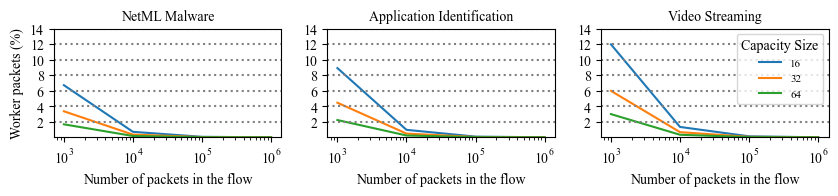

In [9]:
### PERCENTAGE of worker packets in a flow

print(sb_op_3)
ops = [sb_op_3,sb_op_4,sb_op_1,sb_op_2,sb_op_5]
x= [1000,10000,100000,1000000] #total number o packets in the flow
capacity_size = [16,32,64]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(10, 1.6)) #layout='constrained' #default size = [6.4, 4.8]) #layout='constrained'

#ax0.set_title('percentage of worker packets in a flow - NetML Malware')
ax0.set_title('NetML Malware', fontsize=10)
ax0.set_ylabel('Worker packets (%)')
y1= [wp3[0]/(wp3[0]+x[0])*100, wp3[0]/(wp3[0]+x[1])*100, wp3[0]/(wp3[0]+x[2])*100, wp3[0]/(wp3[0]+x[3])*100] #percentage of packets that are worker packets
y2= [wp3[1]/(wp3[0]+x[0])*100, wp3[1]/(wp3[0]+x[1])*100, wp3[1]/(wp3[0]+x[2])*100, wp3[1]/(wp3[0]+x[3])*100] #percentage of packets that are worker packets
y3= [wp3[2]/(wp3[0]+x[0])*100, wp3[2]/(wp3[0]+x[1])*100, wp3[2]/(wp3[0]+x[2])*100, wp3[2]/(wp3[0]+x[3])*100] #percentage of packets that are worker packets
ax0.plot(x, y1, label='16')
ax0.plot(x, y2, label='32')
ax0.plot(x, y3, label='64')
#######################################
ax1.set_title('Application Identification', fontsize=10)
y1= [wp1[0]/(wp1[0]+x[0])*100, wp1[0]/(wp1[0]+x[1])*100, wp1[0]/(wp1[0]+x[2])*100, wp1[0]/(wp1[0]+x[3])*100] #percentage of packets that are worker packets
y2= [wp1[1]/(wp1[0]+x[0])*100, wp1[1]/(wp1[0]+x[1])*100, wp1[1]/(wp1[0]+x[2])*100, wp1[1]/(wp1[0]+x[3])*100] #percentage of packets that are worker packets
y3= [wp1[2]/(wp1[0]+x[0])*100, wp1[2]/(wp1[0]+x[1])*100, wp1[2]/(wp1[0]+x[2])*100, wp1[2]/(wp1[0]+x[3])*100] #percentage of packets that are worker packets
ax1.plot(x, y1, label='16')
ax1.plot(x, y2, label='32')
ax1.plot(x, y3, label='64')
#######################################
ax2.set_title('Video Streaming', fontsize=10)
#ax2.set_ylabel('Percentage of worker packets')
y1= [wp5[0]/(wp5[0]+x[0])*100, wp5[0]/(wp5[0]+x[1])*100, wp5[0]/(wp5[0]+x[2])*100, wp5[0]/(wp5[0]+x[3])*100] #percentage of packets that are worker packets #percentage of packets that are worker packets
y2= [wp5[1]/(wp5[0]+x[0])*100, wp5[1]/(wp5[0]+x[1])*100, wp5[1]/(wp5[0]+x[2])*100, wp5[1]/(wp5[0]+x[3])*100] #percentage of packets that are worker packets #percentage of packets that are worker packets
y3= [wp5[2]/(wp5[0]+x[0])*100, wp5[2]/(wp5[0]+x[1])*100, wp5[2]/(wp5[0]+x[2])*100, wp5[2]/(wp5[0]+x[3])*100] #percentage of packets that are worker packets #percentage of packets that are worker packets

ax2.plot(x, y1, label='16')
ax2.plot(x, y2, label='32')
ax2.plot(x, y3, label='64')

plt.subplots_adjust(bottom=0.2)

#########################################
ax0.set_ylim(0,14)
ax1.set_ylim(0,14)
ax2.set_ylim(0,14)

# ax0.set_xlim(100,100000+10)
# ax1.set_xlim(100,100000+10)
# ax2.set_xlim(100,100000+10)

ax0.set_xlabel('Number of packets in the flow')
ax1.set_xlabel('Number of packets in the flow')
ax2.set_xlabel('Number of packets in the flow')


ax0.set_xscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')

#ax0.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1),fontsize=8)
#ax1.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1),fontsize=8)
ax2.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1),fontsize=8)

y=np.arange(2,16,2)
for i in y:
  ax0.axhline(i, color="grey", linestyle=":")
  ax1.axhline(i, color="grey", linestyle=":")
  ax2.axhline(i, color="grey", linestyle=":")
    
ax0.set_yticks(y)
ax1.set_yticks(y)
ax2.set_yticks(y) 
    
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y-%H-%M-%S")
plt.savefig(f"../graphs/worker-packets-{dt_string}.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [10]:
# switches = ("Input", "Hidden", "Output", "Decode")
# y_value = { #OPs
#     'App-Iden': (sa_recirculations_1 ,sb_recirculations_1 ,sc_recirculations_1 ,sd_recirculations_1),
#     'OS-Detec': (sa_recirculations_2 ,sb_recirculations_2 ,sc_recirculations_2 ,sd_recirculations_2),
#     'NetML-Malware': (sa_recirculations_3 ,sb_recirculations_3 ,sc_recirculations_3 ,sd_recirculations_3),
#     'Country-Origin': (sa_recirculations_4 ,sb_recirculations_4 ,sc_recirculations_4 ,sd_recirculations_4),
#     'Video-Stream': (sa_recirculations_5 ,sb_recirculations_5 ,sc_recirculations_5 ,sd_recirculations_5)
# }

# #plt.subplots_adjust(left=0.183, bottom=0.208, right=0.935, top=0.907, wspace=0.2, hspace=0.2)

# x = np.arange(len(switches))  # the label locations
# width = 0.16  # the width of the bars
# multiplier = -1

# fig, ax = plt.subplots() #layout='constrained'

# for attribute, measurement in y_value.items():
#     offset = width * multiplier 
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3, rotation=45)
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Worker Packets')
# ax.set_title('Number of worker packets required to perforform all operations in one traversal')
# ax.set_xticks(x + width, switches)
# ax.legend(loc='upper right', ncols=3, bbox_to_anchor=(1, 1))
# ax.set_ylim(0,200)


# plt.show()

In [15]:
### PERCENTAGE of worker packets in a flow
#OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD 
print(sb_op_3)
ops = [sb_op_3,sb_op_4,sb_op_1,sb_op_2,sb_op_5]
x= [100,1000,10000,100000] #total number o packets in the flow
capacity_size = [16,32,64]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(10, 1.8)) #layout='constrained' #default size = [6.4, 4.8]) #layout='constrained'

#ax0.set_title('percentage of worker packets in a flow - NetML Malware')
ax0.set_title('NetML Malware', weight='bold')
ax0.set_ylabel('Percentage of worker packets', fontsize=9)
y1= [(sb_op_3/capacity_size[0])/(x[0])+), sb_op_3/capacity_size[0]/x[1], sb_op_3/capacity_size[0]/x[2], sb_op_3/capacity_size[0]/x[3]] #percentage of packets that are worker packets
ax0.plot(x, y1, label='12')
y2= [sb_op_3/capacity_size[1]/x[0], sb_op_3/capacity_size[1]/x[1], sb_op_3/capacity_size[1]/x[2], sb_op_3/capacity_size[1]/x[3]] #percentage of packets that are worker packets
ax0.plot(x, y2, label='32')
y3= [sb_op_3/capacity_size[2]/x[0], sb_op_3/capacity_size[2]/x[1], sb_op_3/capacity_size[2]/x[2], sb_op_3/capacity_size[2]/x[3]] #percentage of packets that are worker packets
ax0.plot(x, y3, label='64')
ax0.set_ylim(0-0.2,max(y1)+1)

ax0.set_ylim(0-1,max(y1)+1)


#######################################
ax1.set_title('Application Identification', weight='bold')
y1= [sb_op_1/capacity_size[0]/x[0], sb_op_1/capacity_size[0]/x[1], sb_op_1/capacity_size[0]/x[2], sb_op_1/capacity_size[0]/x[3]] #percentage of packets that are worker packets
ax1.plot(x,y1, label='12')
y2= [sb_op_1/capacity_size[1]/x[0], sb_op_1/capacity_size[1]/x[1], sb_op_1/capacity_size[1]/x[2], sb_op_1/capacity_size[1]/x[3]] #percentage of packets that are worker packets
ax1.plot(x,y2, label='32')
y3= [sb_op_1/capacity_size[2]/x[0], sb_op_1/capacity_size[2]/x[1], sb_op_1/capacity_size[2]/x[2], sb_op_1/capacity_size[2]/x[3]] #percentage of packets that are worker packets
ax1.plot(x, y3, label='64')
ax1.set_ylim(0-1,max(y1)+1)

#######################################
ax2.set_title('Video Streaming', weight='bold')
#ax2.set_ylabel('Percentage of worker packets')
y1= [sb_op_5/capacity_size[0]/x[0], sb_op_5/capacity_size[0]/x[1], sb_op_5/capacity_size[0]/x[2], sb_op_5/capacity_size[0]/x[3]] #percentage of packets that are worker packets
ax2.plot(x,y1, label='12')
y2= [sb_op_5/capacity_size[1]/x[0], sb_op_5/capacity_size[1]/x[1], sb_op_5/capacity_size[1]/x[2], sb_op_5/capacity_size[1]/x[3]] #percentage of packets that are worker packets
ax2.plot(x,y2, label='32')
y3= [sb_op_1/capacity_size[2]/x[0], sb_op_5/capacity_size[2]/x[1], sb_op_5/capacity_size[2]/x[2], sb_op_5/capacity_size[2]/x[3]] #percentage of packets that are worker packets
ax2.plot(x, y3, label='64')
ax2.set_ylim(0-1,max(y1)+1)

#########################################
ax0.set_ylim(0-0.2,max(y1)+0.5)
ax1.set_ylim(0-0.2,max(y1)+0.5)
ax2.set_ylim(0-0.2,max(y1)+0.5)

ax0.set_xlim(100,100000+10)
ax1.set_xlim(100,100000+10)
ax2.set_xlim(100,100000+10)

ax0.set_xlabel('Number of packets in the flow')
ax1.set_xlabel('Number of packets in the flow')
ax2.set_xlabel('Number of packets in the flow')

#ax2.set_xticks([10, 100, 1000])
ax0.set_xscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')

ax0.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1),fontsize=8)
ax1.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1),fontsize=8)
ax2.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1),fontsize=8)

y=np.arange(0,10,0.5)
for i in y:
  ax0.axhline(i, color="grey", linestyle=":")
  ax1.axhline(i, color="grey", linestyle=":")
  ax2.axhline(i, color="grey", linestyle=":")


now = datetime.now()
dt_string = now.strftime("%d-%m-%Y-%H-%M-%S")
plt.savefig(f"../graphs/worker-packets-{dt_string}.pdf")
plt.show()


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (982733678.py, line 13)

1664


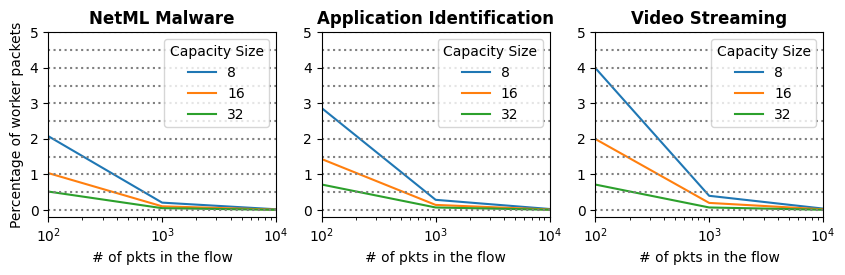

In [10]:

#OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD #OLD 
print(sb_op_3)
ops = [sb_op_3,sb_op_4,sb_op_1,sb_op_2,sb_op_5]
x= [100,1000,10000,] #total number o packets in the flow
capacity_size = [8,16,32]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(10, 2.4)) #layout='constrained' #default size = [6.4, 4.8]) #layout='constrained'

#ax0.set_title('percentage of worker packets in a flow - NetML Malware')
ax0.set_title('NetML Malware', weight='bold')
ax0.set_ylabel('Percentage of worker packets')
y1= [sb_op_3/capacity_size[0]/x[0], sb_op_3/capacity_size[0]/x[1], sb_op_3/capacity_size[0]/x[2]] #percentage of packets that are worker packets
ax0.plot(x, y1, label='8')
y2= [sb_op_3/capacity_size[1]/x[0], sb_op_3/capacity_size[1]/x[1], sb_op_3/capacity_size[1]/x[2]] #percentage of packets that are worker packets
ax0.plot(x, y2, label='16')
y3= [sb_op_3/capacity_size[2]/x[0], sb_op_3/capacity_size[2]/x[1], sb_op_3/capacity_size[2]/x[2]] #percentage of packets that are worker packets
ax0.plot(x, y3, label='32')
ax0.set_ylim(0-0.2,max(y1)+1)

ax0.set_ylim(0-1,max(y1)+1)


#######################################
ax1.set_title('Application Identification', weight='bold')
y1= [sb_op_1/capacity_size[0]/x[0], sb_op_1/capacity_size[0]/x[1], sb_op_1/capacity_size[0]/x[2]] #percentage of packets that are worker packets
ax1.plot(x,y1, label='8')
y2= [sb_op_1/capacity_size[1]/x[0], sb_op_1/capacity_size[1]/x[1], sb_op_1/capacity_size[1]/x[2]] #percentage of packets that are worker packets
ax1.plot(x,y2, label='16')
y3= [sb_op_1/capacity_size[2]/x[0], sb_op_1/capacity_size[2]/x[1], sb_op_1/capacity_size[2]/x[2]] #percentage of packets that are worker packets
ax1.plot(x, y3, label='32')
ax1.set_ylim(0-1,max(y1)+1)

#######################################
ax2.set_title('Video Streaming', weight='bold')
#ax2.set_ylabel('Percentage of worker packets')
y1= [sb_op_5/capacity_size[0]/x[0], sb_op_5/capacity_size[0]/x[1], sb_op_5/capacity_size[0]/x[2]] #percentage of packets that are worker packets
ax2.plot(x,y1, label='8')
y2= [sb_op_5/capacity_size[1]/x[0], sb_op_5/capacity_size[1]/x[1], sb_op_5/capacity_size[1]/x[2]] #percentage of packets that are worker packets
ax2.plot(x,y2, label='16')
y3= [sb_op_1/capacity_size[2]/x[0], sb_op_1/capacity_size[2]/x[1], sb_op_1/capacity_size[2]/x[2]] #percentage of packets that are worker packets
ax2.plot(x, y3, label='32')
ax2.set_ylim(0-1,max(y1)+1)

#########################################
ax0.set_ylim(0-0.2,max(y1)+1)
ax1.set_ylim(0-0.2,max(y1)+1)
ax2.set_ylim(0-0.2,max(y1)+1)

ax0.set_xlim(100,10000+10)
ax1.set_xlim(100,10000+10)
ax2.set_xlim(100,10000+10)

ax0.set_xlabel('# of pkts in the flow')
ax1.set_xlabel('# of pkts in the flow')
ax2.set_xlabel('# of pkts in the flow')

#ax2.set_xticks([10, 100, 1000])
ax0.set_xscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')

ax0.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1))
ax1.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1))
ax2.legend(title="Capacity Size", loc='upper right', ncols=1, bbox_to_anchor=(1, 1))

y=np.arange(0,10,0.5)
for i in y:
  ax0.axhline(i, color="grey", linestyle=":")
  ax1.axhline(i, color="grey", linestyle=":")
  ax2.axhline(i, color="grey", linestyle=":")


now = datetime.now()
dt_string = now.strftime("%d-%m-%Y-%H-%M-%S")
plt.savefig(f"../graphs/worker-packets-{dt_string}.pdf")
plt.show()
